Инициализация библиотек

In [293]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from urllib.parse import urlparse
import pandas_datareader.data as web

Загрузка и анализ датасета

In [294]:
url = 'https://drive.google.com/file/d/1KE4cPt0l4vSm_OzuPNCf64BxMG_fygFL/view'

In [295]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1KE4cPt0l4vSm_OzuPNCf64BxMG_fygFL/view', params='', query='', fragment='')

In [296]:
url = 'https://drive.google.com/file/d/1KE4cPt0l4vSm_OzuPNCf64BxMG_fygFL/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [297]:
dataset = pd.read_csv(url, sep = ";")

In [298]:
dataset.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,-99.99,317.10
4,1958,7,1958.542,315.86,315.86


In [299]:
dataset['Date'] = dataset['year'].apply(str) + '-' + dataset['month'].apply(str)

In [300]:
dataset.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-3
1,1958,4,1958.292,317.45,317.45,1958-4
2,1958,5,1958.375,317.50,317.50,1958-5
3,1958,6,1958.458,-99.99,317.10,1958-6
4,1958,7,1958.542,315.86,315.86,1958-7


In [302]:
dataset = dataset.drop(columns=['year', 'month','decimal_date', 'average'])

In [303]:
dataset.set_index("Date",inplace=True)

In [304]:
dataset.head()

,interpolated
Date,
1958-3,315.71
1958-4,317.45
1958-5,317.50
1958-6,317.10
1958-7,315.86


In [305]:
dataset.describe()

,interpolated
count,706.000000
mean,352.037592
std,26.198294
min,312.660000
25%,328.137500
50%,349.750000
75%,373.162500
max,407.700000


In [306]:
dataset.isna().sum()

interpolated    0
dtype: int64

In [307]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 1958-3 to 2016-12
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   interpolated  706 non-null    float64
dtypes: float64(1)
memory usage: 11.0+ KB


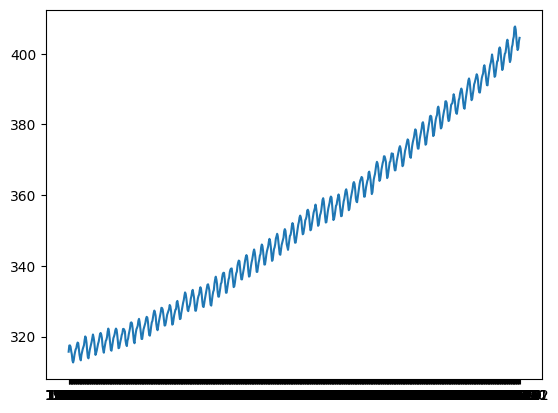

In [308]:
plt.plot(dataset)
plt.show()

In [311]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [312]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

473 233


In [313]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  
  return np.array(dataX), np.array(dataY)

In [314]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [315]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

LSTM

In [316]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2023-08-06 02:35:49.179718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-06 02:35:49.180988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-06 02:35:49.182633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

471/471 - 2s - loss: 0.0212 - 2s/epoch - 4ms/step
Epoch 2/100
471/471 - 1s - loss: 0.0067 - 699ms/epoch - 1ms/step
Epoch 3/100
471/471 - 1s - loss: 9.9460e-04 - 719ms/epoch - 2ms/step
Epoch 4/100
471/471 - 1s - loss: 1.8374e-04 - 708ms/epoch - 2ms/step
Epoch 5/100
471/471 - 1s - loss: 1.7699e-04 - 670ms/epoch - 1ms/step
Epoch 6/100
471/471 - 1s - loss: 1.7401e-04 - 704ms/epoch - 1ms/step
Epoch 7/100
471/471 - 1s - loss: 1.8247e-04 - 722ms/epoch - 2ms/step
Epoch 8/100
471/471 - 1s - loss: 1.7981e-04 - 705ms/epoch - 1ms/step
Epoch 9/100
471/471 - 1s - loss: 1.8131e-04 - 706ms/epoch - 1ms/step
Epoch 10/100
471/471 - 1s - loss: 1.8506e-04 - 652ms/epoch - 1ms/step
Epoch 11/100
471/471 - 1s - loss: 1.8341e-04 - 702ms/epoch - 1ms/step
Epoch 12/100
471/471 - 1s - loss: 1.8650e-04 - 673ms/epoch - 1ms/step
Epoch 13/100
471/471 - 1s - loss: 1.7724e-04 - 732ms/epoch - 2ms/step
Epoch 14/100
471/471 - 1s - loss: 1.7439e-04 - 683ms/epoch - 1ms/step
Epoch 15/100
471/471 - 1s - loss: 1.7843e-04 - 670ms

In [317]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

15/15 [==============================] - 0s 2ms/step


2023-08-06 02:37:04.794655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-06 02:37:04.795861: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-06 02:37:04.797548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 0s 2ms/step
Train Score: 0.01 RMSE
Test Score: 0.04 RMSE


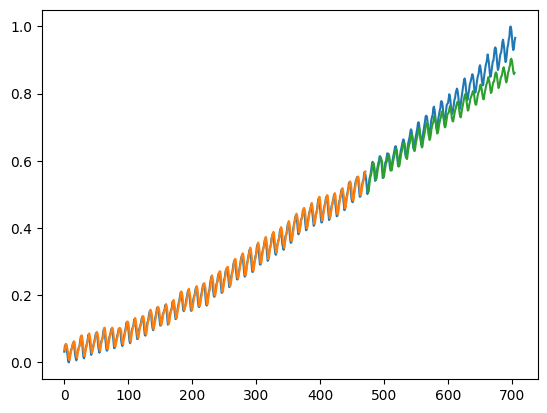

In [318]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()